### 2020.12.11 課堂筆記


## 01 二分逼近法


In [ ]:
def f(x):
  return x**3 - 2*x + 7
f(1)

In [ ]:
def bisection_method(f,a,b,tol=10**(-8)):
  if f(a) * f(b) > 0:
    print('Please input another a & b!')
    return
  elif f(a) * f(b) == 0:
    if f(a) == 0:
      return a
    else:
      return b
  else:
    while abs(a-b) > tol : 
     c = (a + b)/2
     if f(a)*f(c) > 0:
       a = c
     elif f(b)*f(c) > 0:
       b = c
     else:
       return c
       break
    return (a+b)/2

In [ ]:
c = bisection_method(f,1,-3)
print(c)

In [ ]:
f(c)

In [ ]:
c1 = bisection_method(f,1,-3,10**(-12))
print(c1)

In [ ]:
f(c1)

## 02 數值微分:Forward Method


In [ ]:
def Df(f,x,h=10**(-8)):
  return (f(x+h)-f(x))/h 

def Db(f,x,h=10**(-8)):
  return (f(x)-f(x-h))/h 

def Dc(f,x,h=10**(-8)):
  return (f(x+h)-f(x-h))/(2*h)    # /2h 要先括號起來

In [ ]:
p = Df(f,3)
print(p)      # 3**3 - 2 = 25 (有極小誤差值)

In [ ]:
p = Db(f,3)
print(p) 

In [ ]:
p = Dc(f,3)
print(p) 

#### 繪圖

In [ ]:
%pylab inline

In [ ]:
t = linspace(-3,0,200)
y = f(t)
plot(t,y)
y1 = array([0]*200) #製作200個[0]的陣列

In [ ]:
y1

#### 交點

In [ ]:
plot(t,y,'b',t,y1,'r') 

In [ ]:
plot(t,y,'b')
plot(t,y1,'r')

#### Q: 數值微分上h(step size)越小越好?


Forward Method

In [ ]:
R = list()
for i in range(1,17):
  h = 10**(-i)
  fp = Df(f,3,h)
  R.append(abs(fp-25))
print(R)

[0.9100000000000463, 0.09009999999953777, 0.009000999997255121, 0.0009000100703815406, 9.000030444994422e-05, 9.003406375995837e-06, 8.60586624185089e-07, 6.311893230304122e-08, 2.0685092749772593e-06, 1.9832077668979764e-05, 0.0002643850166350603, 0.003998871397925541, 0.024422838032478467, 0.5795384873636067, 3.6837179271969944, 25.0]


In [ ]:
len(R)

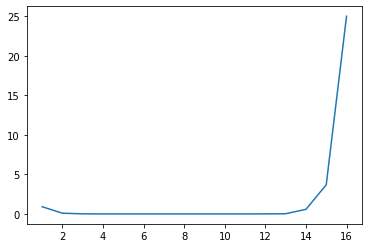

In [ ]:
tt = array(range(1,17))
plot(tt,array(R))

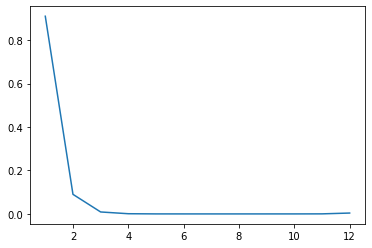

In [ ]:
plot(tt[:12],R[:12])

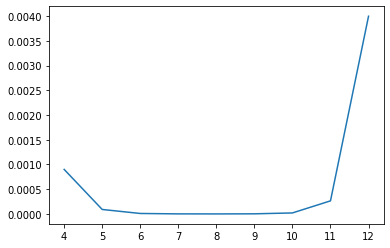

In [ ]:
plot(tt[3:12],R[3:12])

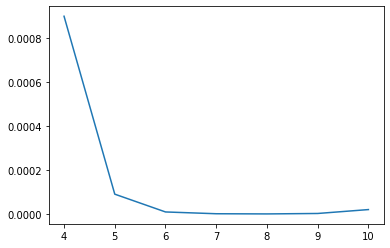

In [ ]:
plot(tt[3:10],R[3:10])

Central Method

In [ ]:
R1 = list()
for i in range(1,17):
  h = 10**(-i)
  fp = Dc(f,3,h)
  R1.append(abs(fp-25))
print(R1)

[0.010000000000029985, 9.999999956988859e-05, 9.9999688529806e-07, 1.00669694802491e-08, 2.970033108340431e-10, 4.382627594168298e-09, 2.759179551503621e-08, 6.311893230304122e-08, 2.0685092749772593e-06, 2.0685092749772593e-06, 0.0002643850166350603, 0.0022225145585252903, 0.024422838032478467, 0.5795384873636067, 3.6837179271969944, 25.0]


In [ ]:
len(R1)

16

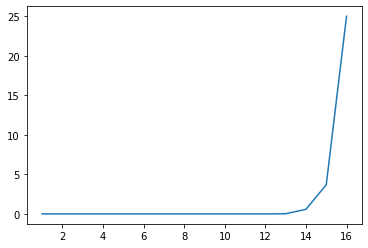

In [ ]:
tt = array(range(1,17))
plot(tt,array(R))

In [ ]:
R = list(R)
min(R)

2.970033108340431e-10

In [ ]:
R.index(min(R))

4

In [ ]:
tt[4]

5

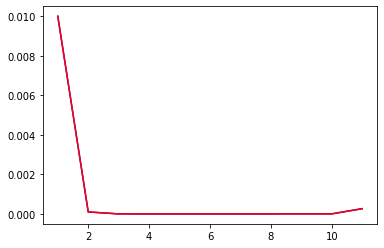

In [ ]:
plot(tt[:11],array(R[:11]),'b',tt[:11],array(R1[:11]),'r')

## 03 基因演算法

In [ ]:
def Gene_method(f,x=3,tol=10**(-12)):
  while abs(f(x))>tol:
    x1 = x+0.1*randn()
    if abs(f(x))>abs(f(x1)):
      x = x1
  return x 

In [ ]:
x3 = Gene_method(f,-2,10**(-5))
print(x3)

-2.258259266779382


In [ ]:
f(x3)

-5.098605208253559e-06